In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np


In [2]:
data=pd.read_csv("C:/ML Projects/jigsaw-toxic-comment-classification-challenge/train.csv/train.csv")
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
toxic_comments = data.loc[data['toxic'] == 1, 'comment_text']
toxic_comments


6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12        Hey... what is it..\n@ | talk .\nWhat is it......
16        Bye! \n\nDon't look, come or think of comming ...
42        You are gay or antisemmitian? \n\nArchangel WH...
43                 FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!
                                ...                        
159494    "\n\n our previous conversation \n\nyou fuckin...
159514                    YOU ARE A MISCHIEVIOUS PUBIC HAIR
159541    Your absurd edits \n\nYour absurd edits on gre...
159546    "\n\nHey listen don't you ever!!!! Delete my e...
159554    and i'm going to keep posting the stuff u dele...
Name: comment_text, Length: 15294, dtype: object

<!-- PREPROCESSING -->


# PREPROCESSING

In [4]:
from tensorflow.keras.layers import TextVectorization

In [5]:
X=data['comment_text']
y=data[data.columns[2:]].values

In [6]:
MAX_FEATURES=200000  #Number of words in the vocab

In [7]:
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')


In [8]:
X.values

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [9]:
vectorizer.adapt(X.values)

In [10]:
library=vectorizer.get_vocabulary()
library

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [11]:
vectorizer("hello, how are you")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288,  73,  20,   7,   0], dtype=int64)>

In [12]:
vectorized_text= vectorizer(X.values)

In [13]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

# Data Pipeline generation -- 
### MCSHBAP- map,cache,shuffle, batch, prefetch

In [14]:
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [15]:
batch_X, batch_y=dataset.as_numpy_iterator().next()  #give me one batch and split into 2 part

In [16]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


In [17]:
len(train)

6981

In [18]:
train_generator=train.as_numpy_iterator()

# Create sequential model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding


In [22]:
model=Sequential()
model.add(Embedding(MAX_FEATURES+1,32))  #Make model understand diffeerent meaning of each word(for each word in we will have 32 diff meaning)
model.add(Bidirectional(LSTM(32,activation='tanh'))) # using tanh because gpu accelaration req for lstm is tanh
model.add(Dense(128, activation='relu')) #layer to make model undestand features 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6,activation='sigmoid')) #final layer give us 6  diff val



In [23]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
history=model.fit(train,epochs=8,validation_data=val)

Epoch 1/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5746s 823ms/step - loss: 0.0759 - val_loss: 0.0457
Epoch 2/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5836s 836ms/step - loss: 0.0468 - val_loss: 0.0398
Epoch 3/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5601s 802ms/step - loss: 0.0407 - val_loss: 0.0355
Epoch 4/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5925s 849ms/step - loss: 0.0364 - val_loss: 0.0313
Epoch 5/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5946s 852ms/step - loss: 0.0323 - val_loss: 0.0277
Epoch 6/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 6825s 978ms/step - loss: 0.0281 - val_loss: 0.0249
Epoch 7/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 6784s 972ms/step - loss: 0.0262 - val_loss: 0.0227
Epoch 8/8
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 6412s 919ms/step - loss: 0.0233 - val_loss: 0.0201


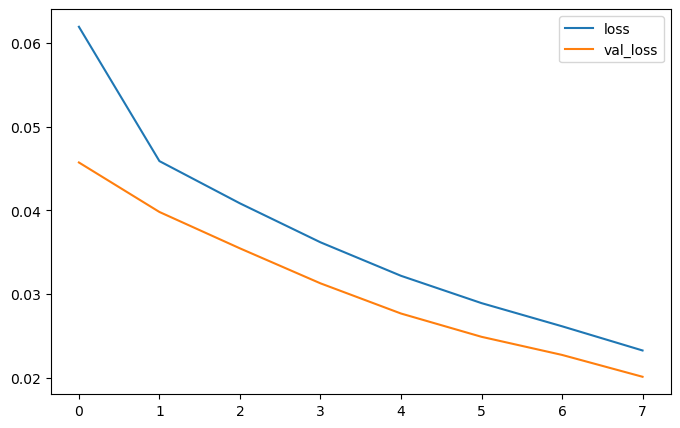

In [36]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()


In [30]:
model.save("my_model.h5")

# Predictions

In [38]:

input_text= vectorizer("You fucking suck!")

In [40]:
data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [41]:
batch= test.as_numpy_iterator().next()

In [43]:
batch_X, batch_y=test.as_numpy_iterator().next()

In [45]:
(model.predict(batch_X)>0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res=model.predict(np.expand_dims(input_text,0))

# Evaluation

In [46]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [48]:
for batch in test.as_numpy_iterator():
    X_true,y_true=batch
    yhat=model.predict(X_true)
    

    y_true=y_true.flatten()
    yhat=yhat.flatten()

    pre.update_state(y_true,yhat)
    re.update_state(y_true,yhat)
    acc.update_state(y_true,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [53]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision: 0.8886311054229736, Recall: 0.880966067314148, Accuracy: 0.5336008071899414


# Gradio app

In [ ]:
!pip install gradio jinja2

In [50]:
import gradio as gr

In [52]:
input_str=vectorizer("love you")
res=model.predict(np.expand_dims(input_str,0))
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[7.6994789e-04, 1.0558189e-17, 3.8234801e-05, 2.5379293e-08,
        5.9749191e-06, 1.6263976e-07]], dtype=float32)

In [54]:
def score_comment(comment):
    vectorized_comment=vectorizer([comment])
    results=model.predict(vectorized_comment)

    text=''
    for idx, col in enumerate(data.columns[2:]):
        text +='{}: {}\n'.format(col,results[0][idx]>0.5)
    return text

In [56]:
import gradio as gr

interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder="Comment to score"),
    outputs="text"
)

interface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
